In [7]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout
import matplotlib.pyplot as plt
import numpy as np

mnist = tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [8]:
mnist = tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [11]:
x_test.shape

(10000, 28, 28)

In [12]:
input_shape=(28,28,1)

In [13]:
x_train=x_train.reshape(x_train.shape[0],28,28,1)
x_test=x_test.reshape(x_test.shape[0],28,28,1)

In [17]:
x_train.dtype()

TypeError: 'numpy.dtypes.UInt8DType' object is not callable

In [18]:
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')

In [19]:
x_train.dtype()

TypeError: 'numpy.dtypes.Float32DType' object is not callable

In [20]:
x_train=x_train/255
x_test=x_test/255

In [21]:
x_test.shape


(10000, 28, 28, 1)

In [22]:
x_train.shape

(60000, 28, 28, 1)

In [23]:
model=Sequential()
model.add(Conv2D(28,kernel_size=(3,3),input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(200,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(10,activation='softmax'))

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 28)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 4732)              0         
                                                                 
 dense (Dense)               (None, 200)               946600    
                                                                 
 dropout (Dropout)           (None, 200)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                2010      
                                                        

In [25]:
model.compile(
optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [26]:
model.fit(x_train,y_train,epochs=2)

Epoch 1/2
1875/1875 [==============================] - 39s 20ms/step - loss: 0.2033 - accuracy: 0.9385
Epoch 2/2
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0849 - accuracy: 0.9748


In [27]:
test_loss,test_acc=model.evaluate(x_test,y_test)
print("Loss=%.3f"%test_loss)
print("Accuracy =%.3f" %test_acc)

313/313 [==============================] - 2s 7ms/step - loss: 0.0638 - accuracy: 0.9797
Loss=0.064
Accuracy =0.980


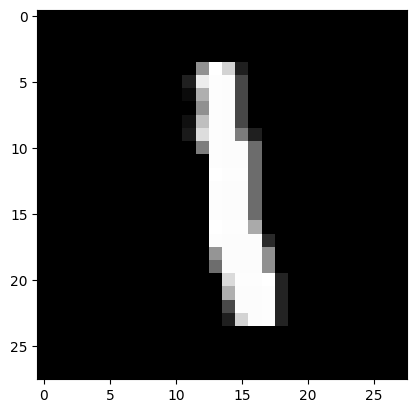

1/1 [==============================] - 0s 44ms/step
predict Class:1


In [34]:
image=x_train[6]
plt.imshow(np.squeeze(image),cmap='gray')
plt.show()

image=image.reshape(1,image.shape[0],image.shape[1],image.shape[2])
predict_model=model.predict([image])
print("predict Class:{}".format(np.argmax(predict_model)))